In [2]:
import pandas as pd
df = pd.read_csv("FoodData_Central_Supporting_Data_csv_2022-10-28/fndds_ingredient_nutrient_value.csv")
print(df.head())

   ingredient code Ingredient description  Nutrient code  Nutrient value  \
0             1001  Butter, stick, salted            203            0.85   
1             1001  Butter, stick, salted            204           82.20   
2             1001  Butter, stick, salted            205            0.06   
3             1001  Butter, stick, salted            208          743.00   
4             1001  Butter, stick, salted            221            0.00   

                      Nutrient value source    FDC ID Derivation code  \
0                                 SR Legacy  173410.0             NaN   
1                                Foundation  790508.0               A   
2                                 SR Legacy  173410.0              NC   
3  Informed by FDC Foundation and SR Legacy       NaN             NaN   
4                                 SR Legacy  173410.0             NaN   

   SR AddMod year  Foundation year acquired Start date   End date  
0          1976.0                   

In [3]:
len(df)

122330

In [4]:
df.columns

Index(['ingredient code', 'Ingredient description', 'Nutrient code',
       'Nutrient value', 'Nutrient value source', 'FDC ID', 'Derivation code',
       'SR AddMod year', 'Foundation year acquired', 'Start date', 'End date'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['nutrient_value'] = pd.to_numeric(df['nutrient_value'], errors='coerce')
df.dropna(subset=['nutrient_value'], inplace=True)

In [6]:
nutrient_summary = df.groupby(['ingredient_code', 'ingredient_description', 'nutrient_code'])['nutrient_value'].mean().reset_index()
pivot_table = nutrient_summary.pivot_table(index=['ingredient_code', 'ingredient_description'], 
                                           columns='nutrient_code', values='nutrient_value')
pivot_table.fillna(0, inplace=True)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_table)


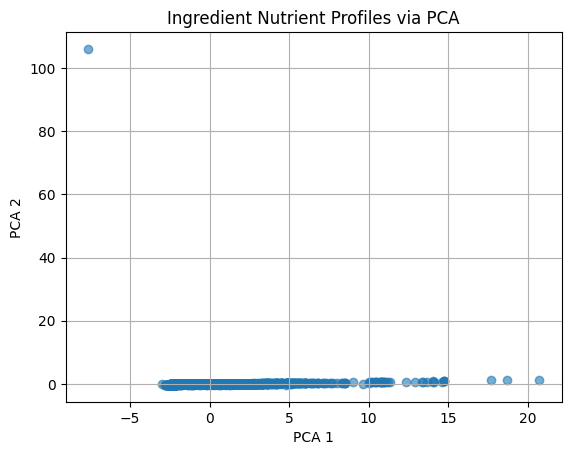

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title('Ingredient Nutrient Profiles via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [10]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 11.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


2025-05-25 01:38:12.494 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-25 01:38:12.515 
  command:

    streamlit run /Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-25 01:38:12.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-25 01:38:12.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-25 01:38:12.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-25 01:38:12.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-25 01:38:12.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-25 01:38:12.5

DeltaGenerator()

In [23]:
!pip install torchvision

  Using cached torchvision-0.22.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
  Using cached torch-2.7.0-cp311-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached pillow-11.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (4.0 kB)
Using cached torchvision-0.22.0-cp311-cp311-macosx_11_0_arm64.whl (1.9 MB)
Using cached torch-2.7.0-cp311-none-macosx_11_0_arm64.whl 

In [26]:
import os
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict
import matplotlib.pyplot as plt


Using device: cpu
Filtering dataset for classes: ['donuts', 'cheese_plate', 'apple_pie']
Samples after filtering: 900
Training samples: 720, Validation samples: 180
Loading pretrained ResNet18...
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/kashifali/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.

100%|██████████████████████████████████████| 44.7M/44.7M [00:03<00:00, 12.0MB/s]



Epoch 1/2
Batch 0/45 | Loss: 0.9342
Batch 10/45 | Loss: 1.9033
Batch 20/45 | Loss: 1.7003
Batch 30/45 | Loss: 0.6504
Batch 40/45 | Loss: 0.8116
Train Loss: 1.0627 | Train Acc: 64.86% | Val Acc: 67.22%

Epoch 2/2
Batch 0/45 | Loss: 0.9303
Batch 10/45 | Loss: 0.5149
Batch 20/45 | Loss: 0.5909
Batch 30/45 | Loss: 0.3446
Batch 40/45 | Loss: 0.8135
Train Loss: 0.6088 | Train Acc: 76.81% | Val Acc: 70.00%


In [ ]:

# ========== CONFIG ==========
data_dir = "food-101/images/"
target_classes = ['donuts', 'cheese_plate', 'apple_pie']  # Choose classes
max_per_class = 300
batch_size = 16
num_epochs = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# =============================

# ========== TRANSFORM ==========
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
# ================================

# ========== CUSTOM DATASET ==========
class FilteredImageFolder(datasets.ImageFolder):
    def __init__(self, root, transform=None, target_classes=None, max_per_class=None):
        super().__init__(root, transform=transform)
        if target_classes:
            print(f"Filtering dataset for classes: {target_classes}")
            class_indices = {cls: i for i, cls in enumerate(target_classes)}
            filtered = []
            class_counter = defaultdict(int)
            for path, label in self.samples:
                class_name = self.classes[label]
                if class_name in target_classes and class_counter[class_name] < max_per_class:
                    filtered.append((path, class_indices[class_name]))
                    class_counter[class_name] += 1
            self.samples = filtered
            self.classes = target_classes
            self.class_to_idx = class_indices
            self.targets = [label for _, label in self.samples]
            print(f"Samples after filtering: {len(self.samples)}")
# ====================================

# Load the dataset
dataset = FilteredImageFolder(data_dir, transform=transform,
                              target_classes=target_classes,
                              max_per_class=max_per_class)

# Split into train and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_ds)}, Validation samples: {len(val_ds)}")

# ========== MODEL ==========
print("Loading pretrained ResNet18...")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(target_classes))
model = model.to(device)

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# ===========================

# ========== TRAIN & EVAL FUNCTIONS ==========
def train(model, loader):
    model.train()
    running_loss, correct = 0.0, 0
    for i, (inputs, labels) in enumerate(loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

        if i % 10 == 0:
            print(f"Batch {i}/{len(loader)} | Loss: {loss.item():.4f}")
    return running_loss / len(loader), correct / len(loader.dataset)

def evaluate(model, loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            correct += (outputs.argmax(1) == labels).sum().item()
    return correct / len(loader.dataset)
# ============================================

# ========== TRAIN LOOP ==========
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train(model, train_loader)
    val_acc = evaluate(model, val_loader)
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val Acc: {val_acc*100:.2f}%")
# =================================


In [27]:
from PIL import Image

def predict_image(image_path, model, transform, class_names):
    model.eval()
    img = Image.open(image_path).convert('RGB')
    img_t = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img_t)
        pred = torch.argmax(output, dim=1).item()
    print(f"Predicted class: {class_names[pred]}")
    plt.imshow(img)
    plt.title(f"Prediction: {class_names[pred]}")
    plt.axis("off")
    plt.show()


In [29]:
!pip3 install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached seaborn-0.13.2-py3-none-any.

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(model, val_loader, class_names):
    y_true = []
    y_pred = []

    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


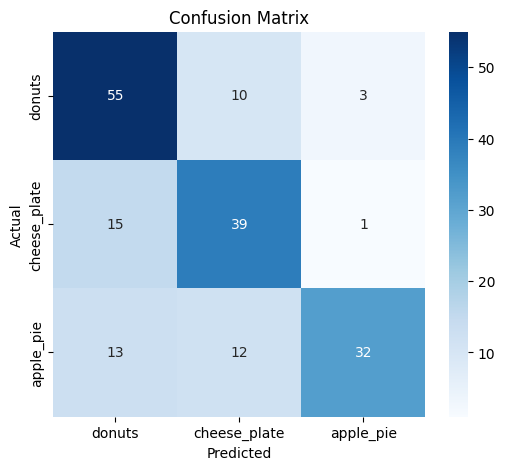


Classification Report:
              precision    recall  f1-score   support

      donuts       0.66      0.81      0.73        68
cheese_plate       0.64      0.71      0.67        55
   apple_pie       0.89      0.56      0.69        57

    accuracy                           0.70       180
   macro avg       0.73      0.69      0.70       180
weighted avg       0.73      0.70      0.70       180

Predicted class: donuts


2025-05-25 12:37:00.355 Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 600, in _handle_events
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 629, in _handle_recv
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 550, in _run_callback
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 170, in _handle_event
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 276, in <lambda>
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 287, in _really_send
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/sugar/socket.py", line 751, in send_multip

In [32]:
# Plot confusion matrix
plot_confusion_matrix(model, val_loader, dataset.classes)

# Predict a sample image
predict_image("food-101/images/donuts/115428.jpg", model, transform, dataset.classes)

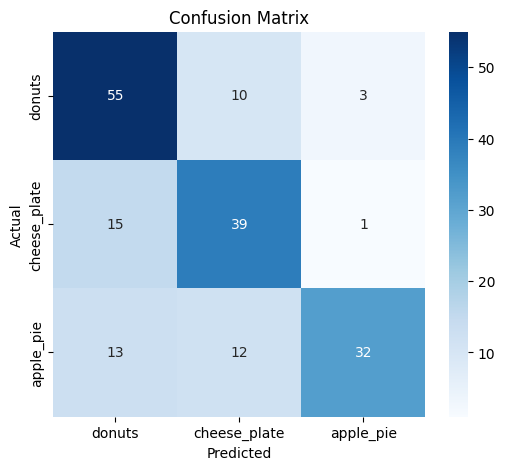


Classification Report:
              precision    recall  f1-score   support

      donuts       0.66      0.81      0.73        68
cheese_plate       0.64      0.71      0.67        55
   apple_pie       0.89      0.56      0.69        57

    accuracy                           0.70       180
   macro avg       0.73      0.69      0.70       180
weighted avg       0.73      0.70      0.70       180

Predicted class: cheese_plate


2025-05-25 12:39:15.191 Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 600, in _handle_events
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 629, in _handle_recv
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 550, in _run_callback
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 170, in _handle_event
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 276, in <lambda>
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 287, in _really_send
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/sugar/socket.py", line 751, in send_multip

In [34]:
# Plot confusion matrix
plot_confusion_matrix(model, val_loader, dataset.classes)

# Predict a sample image
predict_image("food-101/images/cheese_plate/33559.jpg", model, transform, dataset.classes)

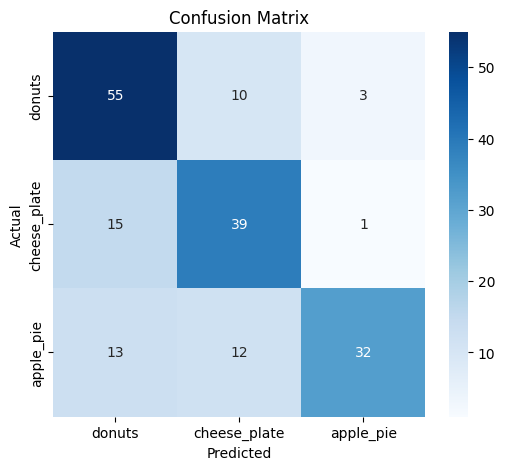


Classification Report:
              precision    recall  f1-score   support

      donuts       0.66      0.81      0.73        68
cheese_plate       0.64      0.71      0.67        55
   apple_pie       0.89      0.56      0.69        57

    accuracy                           0.70       180
   macro avg       0.73      0.69      0.70       180
weighted avg       0.73      0.70      0.70       180

Predicted class: apple_pie


2025-05-25 12:40:09.147 Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 600, in _handle_events
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 629, in _handle_recv
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/eventloop/zmqstream.py", line 550, in _run_callback
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 170, in _handle_event
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 276, in <lambda>
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/ipykernel/iostream.py", line 287, in _really_send
  File "/Users/kashifali/.pyenv/versions/3.11.9/lib/python3.11/site-packages/zmq/sugar/socket.py", line 751, in send_multip

In [35]:
# Plot confusion matrix
plot_confusion_matrix(model, val_loader, dataset.classes)

# Predict a sample image
predict_image("food-101/images/apple_pie/98449.jpg", model, transform, dataset.classes)